# Predict Cell Phone Price Ranges

## 1. Load and Preprocess Data

In [10]:
import pandas as pd
df = pd.read_csv('train.csv')

In [11]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
df.columns.values

array(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], dtype=object)

### X

In [13]:
# X_raw = df.iloc[:, :-1]
X_raw = df.loc[:, df.columns != 'price_range']
X_raw.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [14]:
X_raw.shape

(2000, 20)

#### Normalize the data

In [15]:
# !pip install scikit-learn
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X_raw)
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

### y

In [16]:
y_raw = df['price_range'].values.reshape(-1,1)
y_raw

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]])

In [17]:
y_raw.shape

(2000, 1)

In [18]:
import numpy as np
np.unique(y_raw)

array([0, 1, 2, 3])

In [19]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(y_raw).toarray() #will return a series without toarray
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [20]:
y.shape

(2000, 4)

In [21]:
np.unique(y)

array([0., 1.])

#### Train-test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

## 2. Define the Model

In [23]:
#!pip install tensorflow

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

ImportError: dlopen(/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/_pywrap_tfe.so, 0x0002): Library not loaded: @rpath/_pywrap_tensorflow_internal.so
  Referenced from: <F7F5FFD8-99BB-368B-8A6A-45A3095815B7> /Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/_pywrap_tfe.so
  Reason: tried: '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/xingyuchen/miniconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/xingyuchen/miniconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS@rpath/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utfe.so___Utensorflow/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../../_solib_darwin_x86_64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/python3.9/site-packages/tensorflow/python/../_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/xingyuchen/miniconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/xingyuchen/miniconda3/lib/_pywrap_tensorflow_internal.so' (no such file), '/Users/xingyuchen/miniconda3/bin/../lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/local/lib/_pywrap_tensorflow_internal.so' (no such file), '/usr/lib/_pywrap_tensorflow_internal.so' (no such file, not in dyld cache)

In [ ]:
numInputs = X.shape[1] # 20 features
numOutputs = y.shape[1] # 4 outputs

In [ ]:
# Neural network
mod1 = Sequential() # allows us to add layers to our NN sequentially
mod1.add(Dense(16, input_dim=numInputs, activation='sigmoid')) # first hidden layer, 16 units
mod1.add(Dense(12, activation='sigmoid')) # second hidden layer, 12 units (will determine inputs from previous layer)
mod1.add(Dense(numOutputs, activation='softmax')) # output layer

## 3. Define the Loss Function and Optimizer

- Loss Function: Beacuse we have multiple classes, we will use categorical cross-entropy
    - [Other loss functions in Keras](https://keras.io/api/losses/)
- Optimizer: [Adam](https://keras.io/api/optimizers/adam/)
    - [Other optimizers in Keras](https://keras.io/api/optimizers/)

In [17]:
mod1.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# # what about SGD?
# sgd = keras.optimizers.SGD(learning_rate = 0.01) # defaults to 0.001
# mod1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## 4. Fit the Model

In [18]:
# set verbose = 0 if you don't want to print each epoch
hist1 = mod1.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100


2022-09-30 16:10:13.576383: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-30 16:10:13.737289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 9ms/step - loss: 1.4595 - accuracy: 0.1939
Epoch 2/100
29/29 [==============================] - 0s 7ms/step - loss: 1.4005 - accuracy: 0.2533
Epoch 3/100
29/29 [==============================] - 0s 9ms/step - loss: 1.3790 - accuracy: 0.3083
Epoch 4/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3671 - accuracy: 0.3533
Epoch 5/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3540 - accuracy: 0.3911
Epoch 6/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3400 - accuracy: 0.4450
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3242 - accuracy: 0.4711
Epoch 8/100
29/29 [==============================] - 0s 8ms/step - loss: 1.3046 - accuracy: 0.4878
Epoch 9/100
29/29 [==============================] - 0s 8ms/step - loss: 1.2827 - accuracy: 0.5089
Epoch 10/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2574 - accuracy: 0.5333
Epoch 11/100
29/29 [=

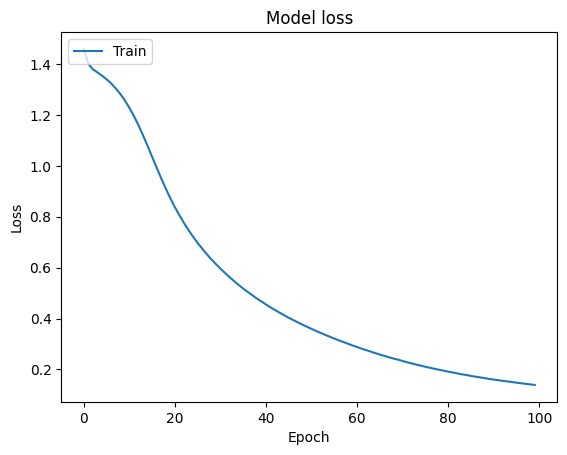

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train'], loc='upper left') 
plt.show()

In [32]:
y_pred = mod1.predict(X_test) # returns prediction outputs as softmax
y_pred

7/7 [==============================] - 0s 2ms/step


array([[2.74165854e-04, 3.57586145e-02, 9.55599487e-01, 8.36770982e-03],
       [2.10443023e-03, 2.44670346e-01, 7.49490440e-01, 3.73474858e-03],
       [2.12706550e-06, 1.47175553e-04, 2.13607885e-02, 9.78489816e-01],
       [9.88004103e-06, 7.77767680e-04, 1.10434920e-01, 8.88777375e-01],
       [9.80837166e-01, 1.88662950e-02, 2.95368285e-04, 1.17915295e-06],
       [9.47144389e-01, 5.20912185e-02, 7.61423085e-04, 2.88688420e-06],
       [8.04253459e-01, 1.93177655e-01, 2.55965325e-03, 9.22990603e-06],
       [1.95769666e-04, 2.45036613e-02, 9.62555349e-01, 1.27452891e-02],
       [5.08860030e-05, 4.83678514e-03, 6.50383532e-01, 3.44728827e-01],
       [2.70883879e-06, 1.91324638e-04, 2.76693106e-02, 9.72136676e-01],
       [6.54587209e-01, 3.41059685e-01, 4.33842978e-03, 1.46947968e-05],
       [3.13176513e-01, 6.78858638e-01, 7.93991983e-03, 2.49001550e-05],
       [6.94006728e-03, 7.00106978e-01, 2.91894317e-01, 1.05871877e-03],
       [1.79708637e-02, 9.56567228e-01, 2.53857672e

In [21]:
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [22]:
from sklearn.metrics import accuracy_score
a =accuracy_score(pred,test)
print('Accuracy is:', a*100, '%')

Accuracy is: 96.5 %


## Train with validation data

In [23]:
mod2 = Sequential() # allows us to add layers to our NN sequentially
mod2.add(Dense(16, input_dim=numInputs, activation='sigmoid')) # first hidden layer, 16 units
mod2.add(Dense(12, activation='sigmoid')) # second hidden layer, 12 units (will determine input dimension from previous layer)
mod2.add(Dense(numOutputs, activation='softmax')) # output layer
mod2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [24]:
hist2 = mod2.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64, verbose =0)

2022-09-30 16:10:36.892749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-30 16:10:37.210039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


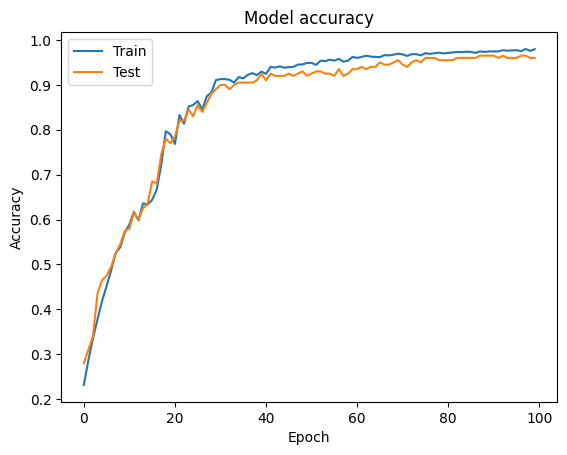

In [25]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

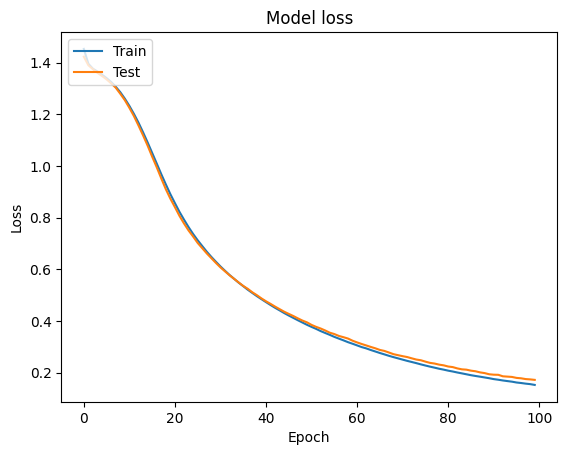

In [26]:
plt.plot(hist2.history['loss']) 
plt.plot(hist2.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## View Weights and Biases

In [27]:
weights, biases = mod2.layers[0].get_weights()

In [28]:
weights.shape

(20, 16)

In [29]:
biases.shape

(16,)